# Minimum Wage Data by State and Country
## Load initial data
### Minimum Wage by State

In [7]:
import pandas as pd
min_wage_by_state = pd.read_csv("C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/LaborLawCenter-MinWageByState.csv")
min_wage_by_state.set_index('State', inplace = True)

In [8]:
min_wage_by_state.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
State,,,,,,,,,,,,
Alabama,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25
Alaska,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84,9.89,10.19,10.34
Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,11.00,12.00,12.15
Arkansas,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.50,9.25,10.00,11.00
California,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00,12.00,13.00,14.00


In [32]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme()

In [14]:
min_wage_by_state['% Change'] = min_wage_by_state['2021'] / min_wage_by_state['2010'] - 1

In [23]:
min_wage_by_state.sort_values(by='% Change', ascending = False)[0:10]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% Change
State,,,,,,,,,,,,,
District of Columbia,8.25,8.25,8.25,8.25,9.50,10.50,11.50,12.50,13.25,14.00,15.00,15.00,0.818182
California,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00,12.00,13.00,14.00,0.750000
New York,7.25,7.25,7.25,7.25,8.00,8.75,9.00,9.70,10.40,11.10,11.80,12.50,0.724138
Colorado,7.24,7.36,7.64,7.78,8.00,8.23,8.31,9.30,10.20,11.10,12.00,12.32,0.701657
Massachusetts,8.00,8.00,8.00,8.00,8.00,9.00,10.00,11.00,11.00,12.00,12.75,13.50,0.687500
Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,11.00,12.00,12.15,0.675862
New Jersey,7.25,7.25,7.25,7.25,8.25,8.38,8.38,8.44,8.60,10.00,11.00,12.00,0.655172
Minnesota,6.15,6.15,6.15,6.15,8.00,9.00,9.50,9.50,9.65,9.86,10.00,10.08,0.639024
Maryland,7.25,7.25,7.25,7.25,7.25,8.00,8.75,9.25,10.10,10.10,11.00,11.75,0.620690


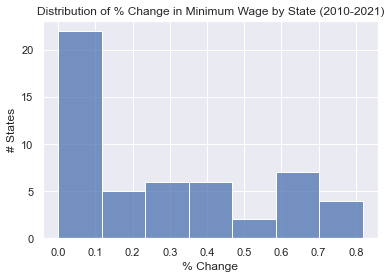

In [22]:
g = sns.histplot(min_wage_by_state['% Change'])
g = g.set(title = 'Distribution of % Change in Minimum Wage by State (2010-2021)', xlabel = "% Change", ylabel = "# States")

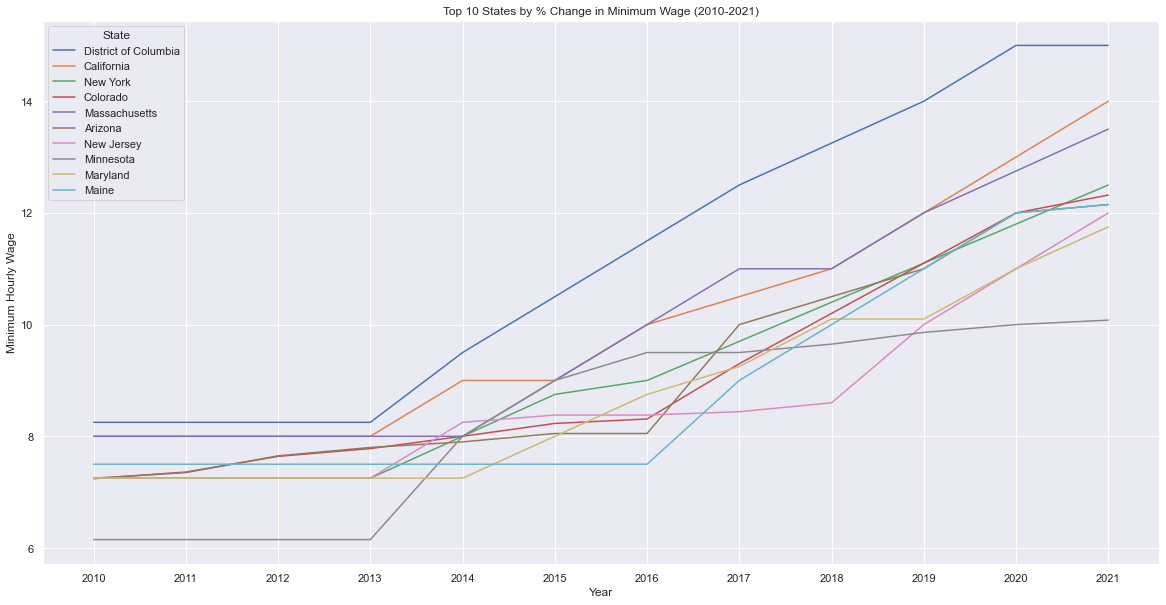

In [38]:
graph_data = min_wage_by_state.sort_values(by = '% Change', ascending = False)[0:10].drop(columns = ['% Change'])
graph_data = pd.melt(graph_data.reset_index(), id_vars = "State")

plt.figure(figsize=(20, 10))
g = sns.lineplot(data = graph_data, x = 'variable', hue = 'State', y = 'value')
g = g.set(title = 'Top 10 States by % Change in Minimum Wage (2010-2021)', xlabel = 'Year', ylabel = 'Minimum Hourly Wage')